In [5]:

import streamlit as st
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import subprocess
import os
from PIL import Image
import torch
import sys

#detection
!python segment/predict.py --source "combistrail-ed.jpg" --img 640 --device "cpu" --weights "models/segment/best-2.pt" --name "yolov9_c_640_detect" \
     --exist-ok --save-txt 

segment/predict: weights=['models/segment/best-2.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=True, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 0059827 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-c-seg summary: 414 layers, 27363670 parameters, 0 gradients, 144.2 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 1 rails, 2 violations, 660.9ms
Speed: 4.5ms pre-process, 660.9ms inference, 14.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/yolov9_c_640_detect
1 labels saved to runs/predict-seg/yolov9_c_640_detect/labels


In [1]:
def extract_class_0_coordinates(filename):
    class_0_coordinates = []
    current_class = None
    
    with open(filename, 'r') as file:
          
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:
                continue
            
            if parts[0] == '0':
                coordinates = [float(x) for x in parts[1:]]
                class_0_coordinates.extend(coordinates)
    
    return class_0_coordinates

coordinates = extract_class_0_coordinates('runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt')


In [2]:
coordinates

[0.595312,
 0.404359,
 0.59375,
 0.406584,
 0.59375,
 0.408808,
 0.590625,
 0.413256,
 0.590625,
 0.41548,
 0.589063,
 0.417705,
 0.589063,
 0.422153,
 0.5875,
 0.424377,
 0.5875,
 0.426601,
 0.576563,
 0.442171,
 0.576563,
 0.444395,
 0.575,
 0.446619,
 0.575,
 0.448843,
 0.573438,
 0.451068,
 0.573438,
 0.453292,
 0.570312,
 0.45774,
 0.570312,
 0.466637,
 0.56875,
 0.468861,
 0.56875,
 0.475534,
 0.567187,
 0.477758,
 0.567187,
 0.484431,
 0.565625,
 0.486655,
 0.565625,
 0.488879,
 0.564062,
 0.491103,
 0.564062,
 0.493327,
 0.5625,
 0.495552,
 0.5625,
 0.504448,
 0.560938,
 0.506673,
 0.560938,
 0.508897,
 0.559375,
 0.511121,
 0.559375,
 0.517794,
 0.557813,
 0.520018,
 0.557813,
 0.522242,
 0.55625,
 0.524466,
 0.55625,
 0.52669,
 0.554688,
 0.528915,
 0.554688,
 0.531139,
 0.553125,
 0.533363,
 0.553125,
 0.535587,
 0.551562,
 0.537811,
 0.551562,
 0.54226,
 0.55,
 0.544484,
 0.55,
 0.546708,
 0.548437,
 0.548932,
 0.548437,
 0.551157,
 0.545313,
 0.555605,
 0.545313,
 0.566726

In [20]:
!python detect.py --source 'combistrail-ed.jpg' --img 640 --device cpu --weights 'models/detect/yolov9-s-converted.pt' --name yolov9_c_640_detect \
--exist-ok --save-txt 

detect: weights=['models/detect/yolov9-s-converted.pt'], source=combistrail-ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_640_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 0059827 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
gelan-s summary: 489 layers, 7105888 parameters, 34224 gradients, 26.4 GFLOPs
image 1/1 /Users/sompoteyouwai/env/YOLOrail/combistrail-ed.jpg: 480x640 3 cars, 1 truck, 225.3ms
Speed: 3.0ms pre-process, 225.3ms inference, 10.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov9_c_640_detect
1 labels saved to runs/detect/yolov9_c_640_detect/labels


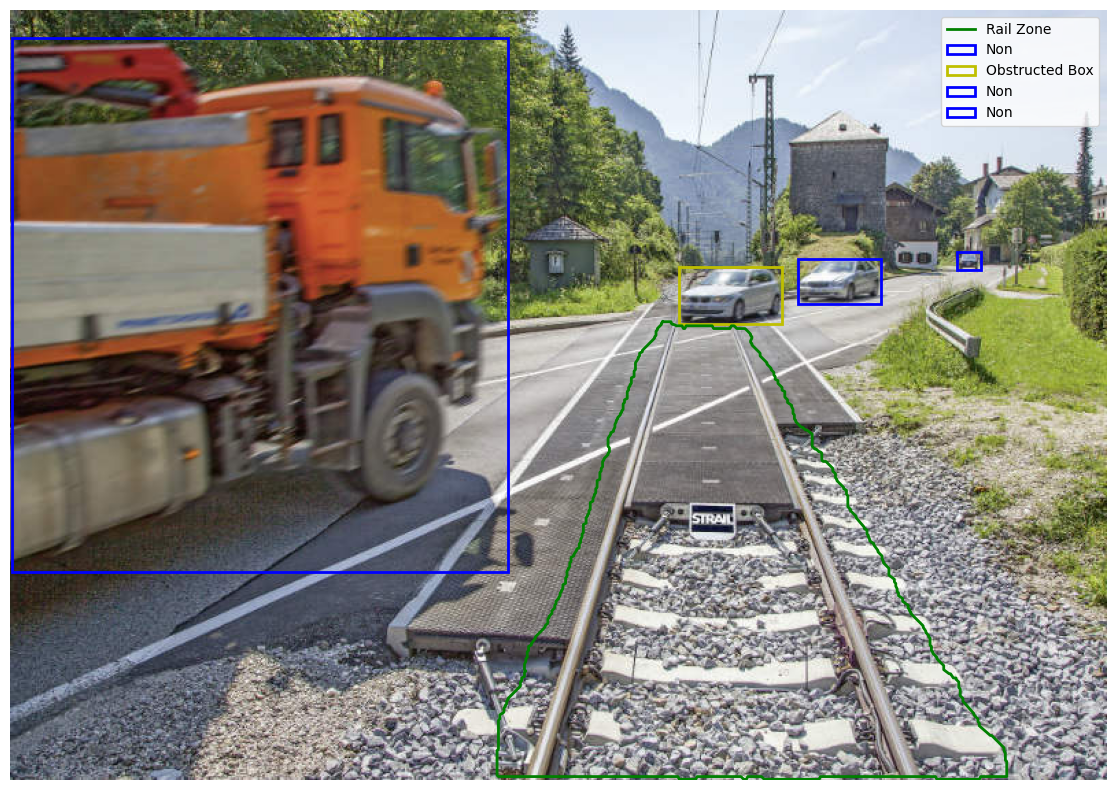

Box 2 0.874375 0.326512 0.02125 0.0231317 is not touching the segment.
Box 2 0.656875 0.370107 0.09375 0.0747331 is obstructed the segment.
Box 2 0.75625 0.351424 0.075 0.0587189 is not touching the segment.
Box 7 0.228125 0.383452 0.45375 0.692171 is not touching the segment.


In [24]:
import numpy as np
from shapely.geometry import Point, Polygon, box as shapely_box
import cv2
import matplotlib.pyplot as plt

def detection_YOLO(img):
    !python segment/predict.py --source "img" --img 640 --device "cpu" --weights "models/segment/best-2.pt" --name "yolov9_c_640_detect" \ 
    --exist-ok --save-txt 
    !python detect.py --source 'img' --img 640 --device cpu --weights 'models/detect/yolov9-s-converted.pt' --name yolov9_c_640_detect \
    --exist-ok --save-txt 
    
def extract_class_0_coordinates(filename):
    class_0_coordinates = []
    current_class = None
    
    with open(filename, 'r') as file:
          
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:
                continue
            
            if parts[0] == '0':
                coordinates = [float(x) for x in parts[1:]]
                class_0_coordinates.extend(coordinates)
    
    return class_0_coordinates



def parse_yolo_box(box_string):
    """Parse a YOLO format bounding box string."""
    try:
        class_id, x_center, y_center, width, height = map(float, box_string.split())
        return int(class_id), x_center, y_center, width, height
    except ValueError:
        raise ValueError("Invalid YOLO box format. Expected 5 space-separated values.")

def yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height):
    """Convert YOLO format coordinates to pixel coordinates."""
    x1 = int((x_center - width / 2) * img_width)
    y1 = int((y_center - height / 2) * img_height)
    x2 = int((x_center + width / 2) * img_width)
    y2 = int((y_center + height / 2) * img_height)
    return x1, y1, x2, y2

def yolo_to_pixel_coord(x, y, img_width, img_height):
    """Convert a single YOLO coordinate to pixel coordinate."""
    return int(x * img_width), int(y * img_height)

def convert_segment_to_pixel(segment, img_width, img_height):
    """Convert segment coordinates from YOLO format to pixel coordinates."""
    pixel_segment = []
    for i in range(0, len(segment), 2):
        x, y = yolo_to_pixel_coord(segment[i], segment[i+1], img_width, img_height)
        pixel_segment.extend([x, y])
    return pixel_segment

def box_segment_relationship(yolo_box, segment, img_width, img_height, threshold):
    """Check the relationship between a bounding box and a segmented area."""
    class_id, x_center, y_center, width, height = parse_yolo_box(yolo_box)
    x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
    
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    segment_polygon = Polygon(zip(pixel_segment[::2], pixel_segment[1::2]))
    
    box_polygon = shapely_box(x1, y1, x2, y2)
    
    if box_polygon.intersects(segment_polygon):
        return "intersecting"
    elif box_polygon.distance(segment_polygon) <= threshold:
        return "obstructed"
    else:
        return "not touching"

def plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold):
    """Plot the image with intersecting boxes, obstructed boxes, and segment."""
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Plot segment
    pixel_segment = convert_segment_to_pixel(segment, img_width, img_height)
    plt.plot(pixel_segment[::2] + [pixel_segment[0]], pixel_segment[1::2] + [pixel_segment[1]], 'g-', linewidth=2, label='Rail Zone')
    
    # Plot boxes
    for yolo_box in yolo_boxes:
        class_id, x_center, y_center, width, height = parse_yolo_box(yolo_box)
        x1, y1, x2, y2 = yolo_to_pixel_coords(x_center, y_center, width, height, img_width, img_height)
        
        relationship = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
        
        if relationship == "intersecting":
            color = 'r'
            label = 'Intersecting Box'
        elif relationship == "obstructed":
            color = 'y'
            label = 'Obstructed Box'
        else:
            color = 'b'
            label = 'Non'
        
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2, label=label))
    
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    # Read the image
    image_path = 'combistrail-ed.jpg'
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read the image at {image_path}")
        return

    img_height, img_width = image.shape[:2]
    detection_YOLO(image)
    coordinates = extract_class_0_coordinates('runs/predict-seg/yolov9_c_640_detect/labels/combistrail-ed.txt')
    
    segment = coordinates # Example segment in YOLO format
    
    yolo_boxes = [
        "2 0.874375 0.326512 0.02125 0.0231317",
        "2 0.656875 0.370107 0.09375 0.0747331",
        "2 0.75625 0.351424 0.075 0.0587189",
        "7 0.228125 0.383452 0.45375 0.692171"
    ]
    
    # Set threshold (in pixels)
    threshold = 10
    
    # Plot the image with boxes and segment
    plot_boxes_and_segment(image, yolo_boxes, segment, img_width, img_height, threshold)
    
    # Print relationship results
    for yolo_box in yolo_boxes:
        try:
            result = box_segment_relationship(yolo_box, segment, img_width, img_height, threshold)
            print(f"Box {yolo_box} is {result} the segment.")
        except ValueError as e:
            print(f"Error processing box {yolo_box}: {str(e)}")

if __name__ == "__main__":
    main()

In [11]:
result

False

In [23]:
pip install shapely


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
